In [16]:
#importing libraries

import pandas as pd
import numpy as np 
import matplotlib
from matplotlib import pyplot as plt

In [17]:
#reading the csv file

df1 = pd.read_csv("ktm_houses_price.csv")
df1.head()


,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [18]:
df1.shape

(2211, 18)

In [19]:
df2 = df1.drop(['Title', 'City','Bathroom','Posted','Amenities','Face','Address', 'Year', 'Views', 'Road', 'Road Width','Road Type','Build Area', 'Area'], axis='columns')

In [20]:
df2.head()


,Price,Bedroom,Floors,Parking
0,90000000,6,2.0,10
1,80000000,5,2.0,9
2,70000000,5,2.0,12
3,130000000,6,3.0,9
4,100000000,6,2.0,10


In [21]:
#Checking if there are any NaN values

df2.isnull().sum()

#Floors Here contain to be NaN values which is then solved by taking Medians

Price         0
Bedroom       0
Floors     1172
Parking       0
dtype: int64

In [22]:
#taking median for NaN values

import math
median_Floors = math.floor(df2.Floors.median())
median_Floors

3

In [23]:
df2.Floors = df2.Floors.fillna(median_Floors)
df2

,Price,Bedroom,Floors,Parking
0,90000000,6,2.0,10
1,80000000,5,2.0,9
2,70000000,5,2.0,12
3,130000000,6,3.0,9
4,100000000,6,2.0,10
...,...,...,...,...
2206,500000,5,3.0,5
2207,12000000,4,2.0,1
2208,27000000,5,2.0,1
2209,300000,9,2.0,4


In [24]:
df2.isnull().sum()

Price      0
Bedroom    0
Floors     0
Parking    0
dtype: int64

# Correlation Analysis


In [25]:
df2.corr()

,Price,Bedroom,Floors,Parking
Price,1.000000,-0.031450,-0.013736,-0.022126
Bedroom,-0.031450,1.000000,0.110636,0.342206
Floors,-0.013736,0.110636,1.000000,0.034296
Parking,-0.022126,0.342206,0.034296,1.000000


In [26]:
import seaborn as sns



<AxesSubplot:>

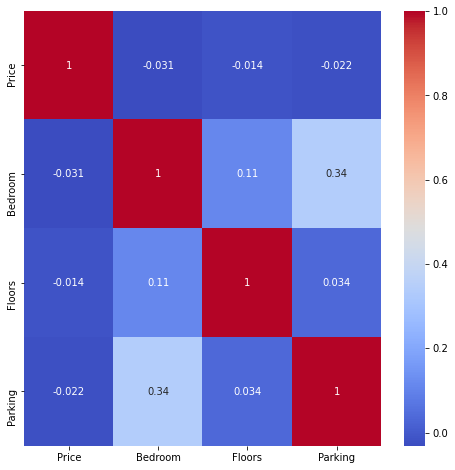

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(df2.corr(),annot = True, cmap='coolwarm' )

In [29]:
X = df2.drop('Price', axis='columns')
X.head()

,Bedroom,Floors,Parking
0,6,2.0,10
1,5,2.0,9
2,5,2.0,12
3,6,3.0,9
4,6,2.0,10


In [30]:
X.describe()

,Bedroom,Floors,Parking
count,2211.000000,2211.000000,2211.000000
mean,2.731796,2.917390,1.007689
std,4.174364,0.871659,2.094905
min,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000
50%,0.000000,3.000000,0.000000
75%,5.000000,3.000000,1.000000
max,95.000000,13.000000,31.000000


In [31]:
y = df2.Price
y.head()

0     90000000
1     80000000
2     70000000
3    130000000
4    100000000
Name: Price, dtype: int64

# Spliting into Train set and Test Set



In [32]:
from sklearn.model_selection import train_test_split


In [33]:
#splitting data into 20% testing and 80% training

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

# Modeling

In [34]:
#Initialize linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()


In [35]:
#Training the model with our training data

reg.fit(X_train, y_train)

 

LinearRegression()

# Predictions

In [36]:
#Print the coefficients/weight for each column of the model
print(reg.coef_)

[-4.42458523e+10 -1.31762037e+11 -5.21689153e+10]


In [37]:
#Printing the predictions on our test data

y_pred = reg.predict(X_test)
print(y_pred)

[ 6.58973450e+11  7.11142365e+11 -1.98885356e+11  5.88278910e+11
  5.88278910e+11  1.39848363e+11  2.34312092e+11  5.88278910e+11
  5.88278910e+11  5.88278910e+11  5.88278910e+11  9.83565023e+11
  4.11295501e+11  2.78557944e+11  1.58373988e+11  5.88278910e+11
  5.88278910e+11 -5.18226689e+10  1.45820387e+11  1.82143177e+11
  2.40101132e+11  3.14880734e+11  3.14880734e+11  1.92992798e+11
  2.62711818e+11  6.45261347e+11  5.88278910e+11  3.51203523e+11
  5.88278910e+11  5.88278910e+11  7.20040948e+11  2.18465966e+11
  4.99787206e+11  3.79603249e+11  4.90888623e+11  3.22803796e+11
 -2.06808419e+11  3.59126586e+11  2.02619840e+11  3.14880734e+11
  5.88278910e+11  2.70634881e+11  9.83565023e+11  5.88278910e+11
  3.22803796e+11  1.01574535e+11  3.22803796e+11  5.43057539e+11
  2.62711818e+11  5.88278910e+11  5.88278910e+11  4.46642771e+11
  3.06957671e+11  1.58373988e+11  5.88278910e+11  1.22051198e+11
  5.88278910e+11  4.11295501e+11  2.62711818e+11  5.88278910e+11
  2.70634881e+11 -1.59998

In [38]:
#Printing the actual values
print(y_test)


2025     7500000
47      14000000
331       790000
2103     1600000
173      3500000
          ...   
781     19200000
1196     1400000
427     43500000
1979    19200000
1861    14500000
Name: Price, Length: 443, dtype: int64


# Accuracy Check


In [39]:
#accuracy check of model using mean square error

print(np.mean((y_pred - y_test)**2))

4.412086500089967e+25


In [44]:
#accuracy check using sklearn metrics
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

4.412086500089967e+25
